Step 1. Importing the Dependencies 

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


Step 2. Load the data

In [28]:
df = pd.read_csv('H:/data science/Netflix Data Analysis/netflix1.csv')

In [29]:
print(df.head(3))

  show_id     type                 title         director        country  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
1      s3  TV Show             Ganglands  Julien Leclercq         France   
2      s6  TV Show         Midnight Mass    Mike Flanagan  United States   

  date_added  release_year rating  duration  \
0  9/25/2021          2020  PG-13    90 min   
1  9/24/2021          2021  TV-MA  1 Season   
2  9/24/2021          2021  TV-MA  1 Season   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  


In [30]:
df.shape

(8790, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Step 3. Clean The Data

In [32]:
#checking if Null values present

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [33]:
#drop Duplicates 
df.drop_duplicates()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [34]:
# Drop row with missing critical information
df.dropna(subset=['director','country'],inplace = True)

In [35]:
df = df[df['director'] != 'Not Given']

In [36]:
df.shape

(6202, 10)

In [37]:
#Changing 'date_added' datatype to Datetime formate

df['date_added']= pd.to_datetime(df['date_added'])

In [38]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


Step 4. EDA

In [39]:
#content Type Distribution (Movies Vs TV Shows)
type_count = df['type'].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19512\3137667302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values,palette='Set2')


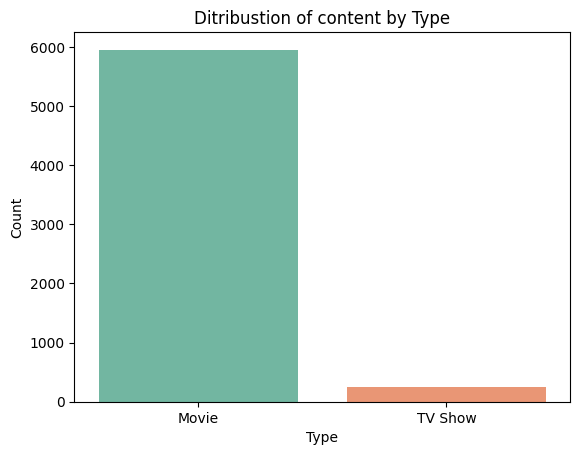

In [40]:
# Plot the Distribution
plt.Figure(figsize=(8,6))
sns.barplot(x=type_count.index, y=type_count.values,palette='Set2')
plt.title('Ditribustion of content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [41]:
# 1. Most Common Genres 
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [] )
genres_counts = pd.Series(all_genres).value_counts().head(10)

In [42]:
genres_counts

 International Movies       2582
Dramas                      1586
Comedies                    1188
Action & Adventure           851
 Dramas                      815
Documentaries                780
 Independent Movies          731
 Romantic Movies             602
Children & Family Movies     574
 Thrillers                   510
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19512\2922745040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts,y=genres_counts.index,palette='Set3')


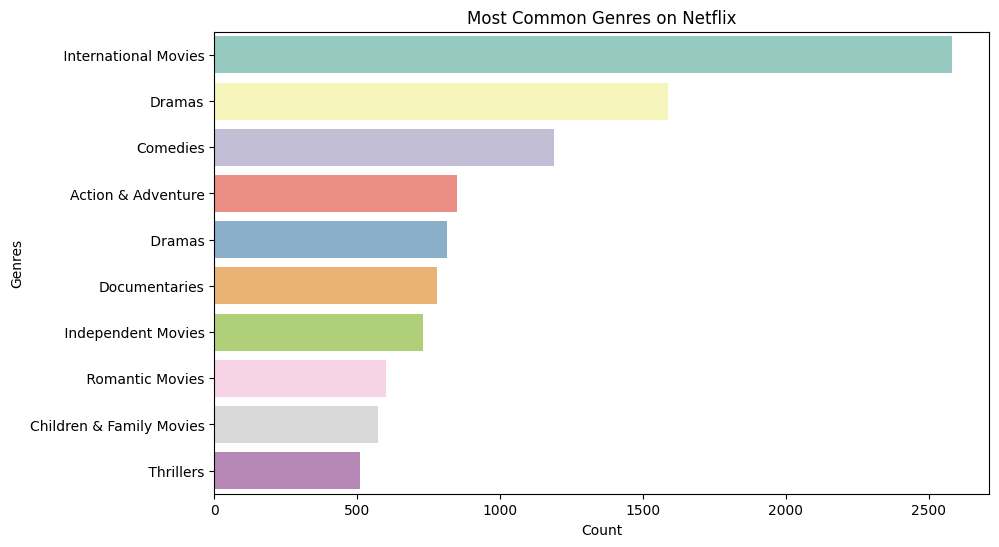

In [43]:
# 2. Plot most common genres 
plt.figure(figsize=(10,6))
sns.barplot(x=genres_counts,y=genres_counts.index,palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19512\2179258012.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='years_added',data=df,palette='coolwarm')


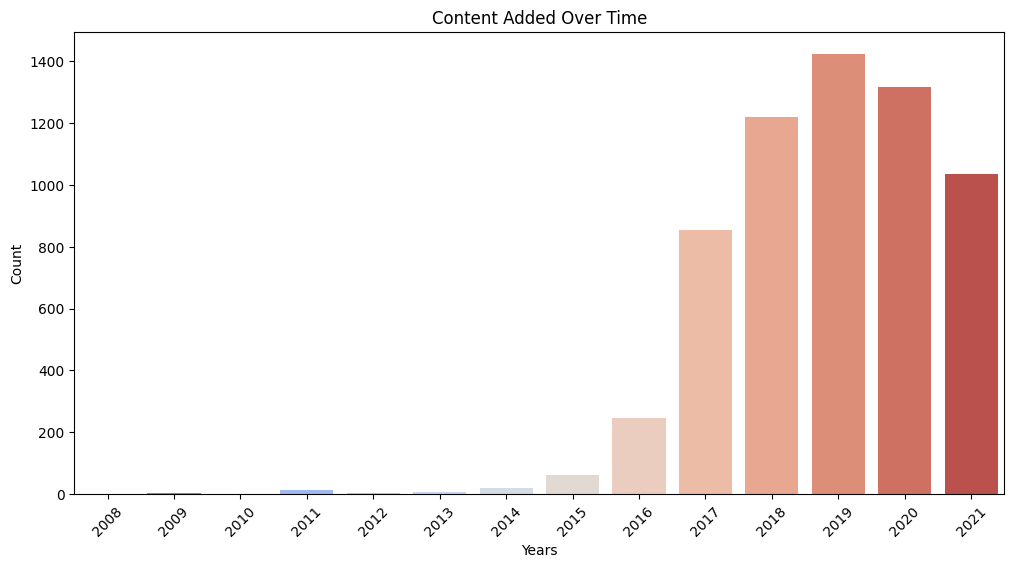

In [44]:
# 3. Content Added Over time
#Extract year and month from 'date_added'

df['years_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# plot Content added over the years

plt.figure(figsize=(12,6))
sns.countplot(x='years_added',data=df,palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19512\4211903434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values ,y= top_directors.index,palette='Blues_d')


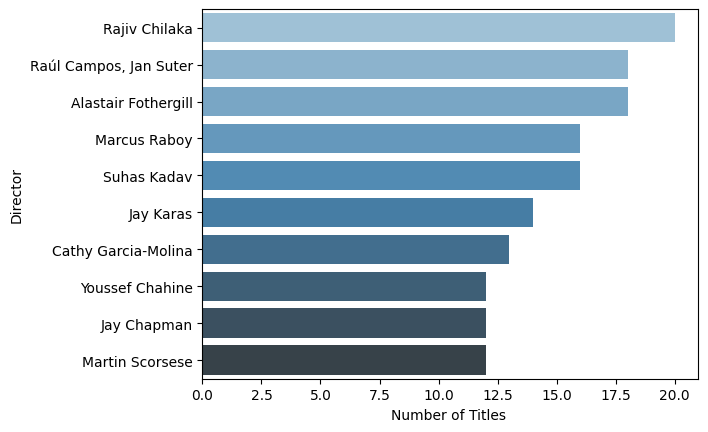

In [47]:
# 4. Top 10 Directors with the Most Titles
# count titles by director
top_directors = df['director'].value_counts().head(10) 
#top_directors
sns.barplot(x=top_directors.values ,y= top_directors.index,palette='Blues_d')
plt.xlabel('Number of Titles ')
plt.ylabel('Director')
plt.show()

In [57]:
# Word Cloud of Movie Title 
#Genarate word Cloud

movie_titles = df[df['type']=='Movies']['title']
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(''.join(movie_titles))

NameError: name 'WordCloud' is not defined

In [50]:
print(movie_titles)

Series([], Name: title, dtype: object)
